In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS + VISITOR ATTENTION INDEX - DATA COMPOSITION 4 (Fixed Set Test).csv')
df.head(5)

,Monthly,Tourist Arrival,Number of Posts,Number of Comments,Airbnb Vietnam,Vietnam restaurant,Shopping in Hanoi,Shopping in Ho Chi Minh,Vietnam tour,Skyscanner,...,Hoi An,Vietnam weather,Visa for Vietnam,Sgn airport,Phu Quoc,Vietnam itinerary,Vietnam trip,Things to do in Hue,Vietnam backpackers,Class
0,01/01/2008,399556,403,3049,11,59,32,8,58,7,...,27,58,29,18,20,0,32,0,8,Train
1,01/02/2008,411032,357,3211,0,51,0,0,46,6,...,27,58,31,10,19,5,39,7,5,Train
2,01/03/2008,414332,344,3153,0,57,7,24,58,6,...,27,50,29,38,28,6,30,0,0,Train
3,01/04/2008,395900,338,3184,0,51,6,9,58,6,...,27,41,30,25,22,8,45,0,8,Train
4,01/05/2008,366387,369,2964,0,57,0,7,57,6,...,27,44,24,16,22,5,47,0,9,Train


In [3]:
x=df.drop('Tourist Arrival', axis=1)
y=df['Tourist Arrival']

In [4]:
train = df[df["Class"] == "Train"]
validation = df[df["Class"] == "Validation"]
test = df[df["Class"] == "Test"]
print(train.shape)
print(test.shape)

(133, 24)
(41, 24)


In [5]:
train = train.drop(['Class'], axis=1)
validation = validation.drop(['Class'], axis=1)
test = test.drop(['Class'], axis=1)

In [6]:
target_column_train = ['Tourist Arrival']
predictors_train = list(set(list(train.columns))-set(target_column_train))

x_train = train[predictors_train].values
y_train = train[target_column_train].values


print(x_train.shape)
print(y_train.shape)

(133, 22)
(133, 1)


In [7]:
target_column_validation = ['Tourist Arrival'] 
predictors_validation = list(set(list(validation.columns))-set(target_column_validation))

x_validation = validation[predictors_validation].values
y_validation = validation[target_column_validation].values

print(x_validation.shape)
print(y_validation.shape)

(12, 22)
(12, 1)


In [8]:
target_column_test = ['Tourist Arrival'] 
predictors_test = list(set(list(test.columns))-set(target_column_test))

x_test = test[predictors_test].values
y_test = test[target_column_test].values

print(x_test.shape)
print(y_test.shape)

(41, 22)
(41, 1)


<AxesSubplot:>

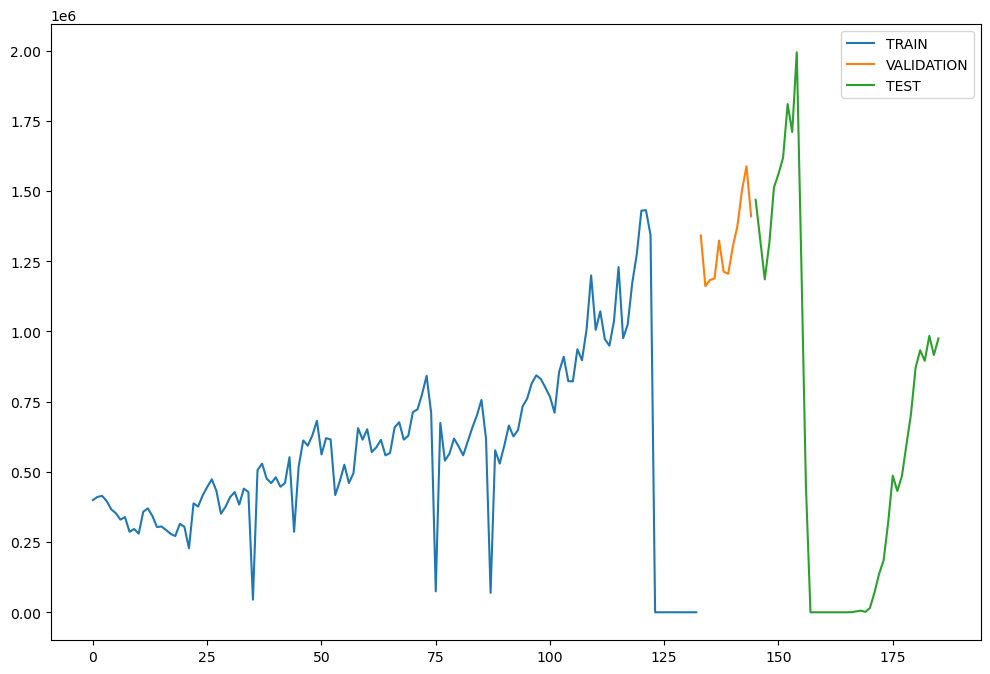

In [9]:
train['Tourist Arrival'].plot(legend=True, label='TRAIN')
validation['Tourist Arrival'].plot(legend=True, label='VALIDATION')
test['Tourist Arrival'].plot(legend=True, label='TEST', figsize=(12,8))

In [10]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12
alpha = 0.0001
model = SimpleExpSmoothing(train['Tourist Arrival']).fit(smoothing_level=alpha)
y_pred = model.forecast(41).rename('SES Forecast')

In [11]:
from math import sqrt
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [12]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 637878.1603000137


In [13]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 554026.3237467336


In [14]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 5.536920707232172e+20


Text(0.5, 1.0, 'Tourist Arrivals Test and Predicted Data \n ETS - Time Series + Tripadvisors Index + Visitor Attention Index - Data Composition 4 (Fixed Set Test)')

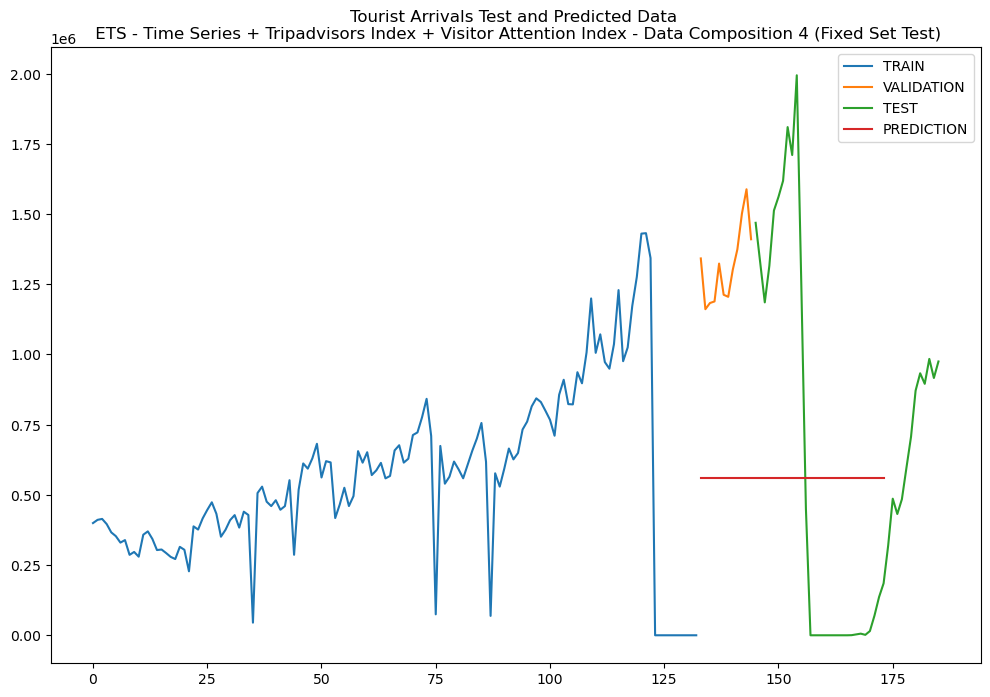

In [15]:
train['Tourist Arrival'].plot(legend=True, label='TRAIN')
validation['Tourist Arrival'].plot(legend=True, label='VALIDATION')
test['Tourist Arrival'].plot(legend=True, label='TEST', figsize=(12,8))
y_pred.plot(legend=True, label='PREDICTION')
plt.title("Tourist Arrivals Test and Predicted Data \n ETS - Time Series + Tripadvisors Index + Visitor Attention Index - Data Composition 4 (Fixed Set Test)")
